In [1]:
import cv2
import os
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt

import glob
import pandas as pd

In [2]:
train_df = pd.read_csv("../data/train.csv")
train_images = glob.glob("../data/train_images/*")
img = cv2.imread(train_images[2])


In [3]:
def get_images(img):
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgYUV = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgY = imgYUV[:,:,0]


    canny = cv2.Canny(imgY, 100, 200)
    return imgRGB, img_gray, canny

In [4]:
def vis(img):
    imgRGB, img_gray, canny = get_images(img)

    fig, axes = plt.subplots(ncols=3, figsize=(20,5))
    axes[0].imshow(imgRGB, vmin=0, vmax=255)
    axes[0].set_title('RGB')
    axes[0].get_xaxis().set_visible(False)
    axes[0].get_yaxis().set_visible(False)   
    axes[1].imshow(img_gray, cmap="gray", vmin=0, vmax=255)
    axes[1].set_title('gray_image')
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)
    axes[2].imshow(canny, cmap="gray", vmin=0, vmax=255)
    axes[2].set_title('canny')
    axes[2].get_xaxis().set_visible(False)
    axes[2].get_yaxis().set_visible(False)

In [5]:
train_df_0 = train_df.loc[train_df["label"] == 0].reset_index(drop=True)
train_df_1 = train_df.loc[train_df["label"] == 1].reset_index(drop=True)
train_df_2 = train_df.loc[train_df["label"] == 2].reset_index(drop=True)
train_df_3 = train_df.loc[train_df["label"] == 3].reset_index(drop=True)


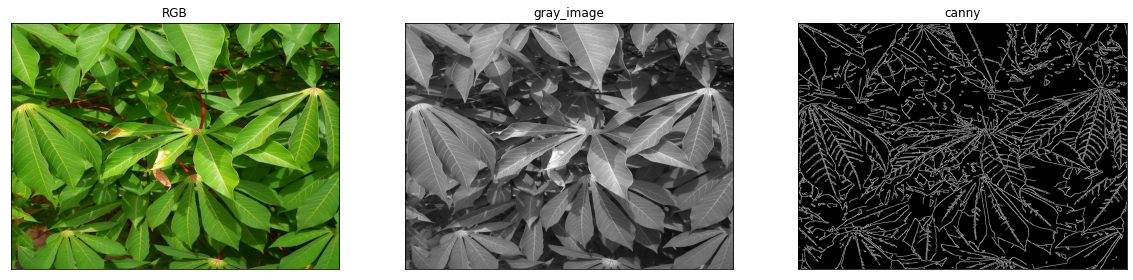

In [31]:
idx = 5
img = os.path.join("../data/train_images", train_df_0.loc[idx, "image_id"])
img = cv2.imread(img)
vis(img)

../data/train_images/101253257.jpg


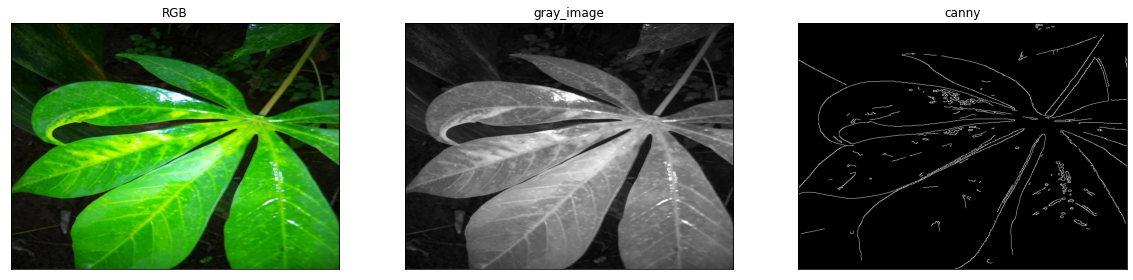

In [46]:
idx = 9
img = os.path.join("../data/train_images", train_df_1.loc[idx, "image_id"])
print(os.path.join("../data/train_images", train_df_1.loc[idx, "image_id"]))
img = cv2.imread(img)
vis(img)

../data/train_images/1009749557.jpg


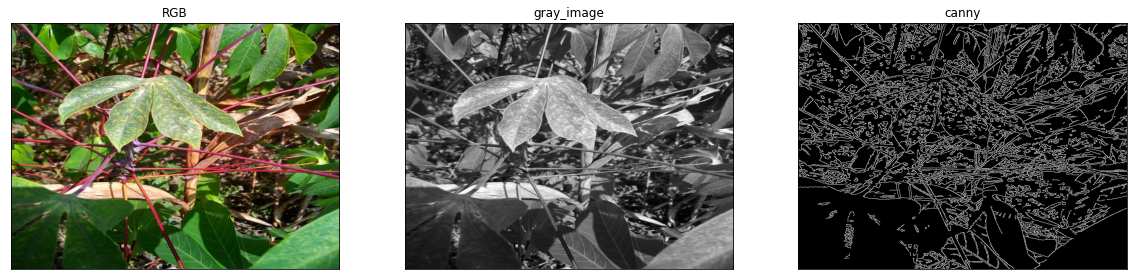

In [44]:
idx = 7
img = os.path.join("../data/train_images", train_df_2.loc[idx, "image_id"])
print(os.path.join("../data/train_images", train_df_2.loc[idx, "image_id"]))
img = cv2.imread(img)
vis(img)

../data/train_images/1003987001.jpg


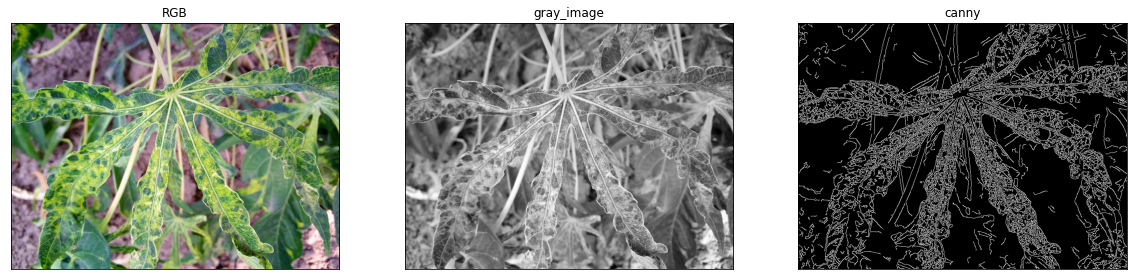

In [47]:
idx = 9
img = os.path.join("../data/train_images", train_df_3.loc[idx, "image_id"])
print(os.path.join("../data/train_images", train_df_3.loc[idx, "image_id"]))
img = cv2.imread(img)
vis(img)

In [11]:
train_df_1["image_id"].values

array(['100042118.jpg', '1000723321.jpg', '1002088496.jpg', ...,
       '997973414.jpg', '998910982.jpg', '999474432.jpg'], dtype=object)

In [2]:
import timm

In [3]:
timm

<module 'timm' from '/home/koga/.pyenv/versions/kaggle/lib/python3.7/site-packages/timm/__init__.py'>

In [4]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)


['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gluon_inception_v3',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resn

In [6]:
model = timm.create_model("hrnet_w48", pretrained=False)

In [7]:
model

 (3): Sequential(
            (0): Conv2d(384, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): Upsample(scale_factor=2.0, mode=nearest)
          )
        )
        (3): ModuleList(
          (0): Sequential(
            (0): Sequential(
              (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
              (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU()
            )
            (1): Sequential(
              (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
              (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU()
            )
            (2): Sequential(
              (0): Conv2d(48, 384, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
              

In [39]:

def onehot(size, target):
    vec = torch.zeros(size, dtype=torch.float32)
    vec[target] = 1.
    return vec
import torch
import torch.nn as nn

class TemperedLoss(nn.Module):
    def __init__(self, t1, t2, smoothing=0.0, num_iter=5, num_classes=5):
        super(TemperedLoss, self).__init__()
        self.t1 = t1
        self.t2 = t2
        self.smoothing = smoothing
        self.num_iter = num_iter
        self.num_classes = num_classes

    def forward(self, input, targets):
        targets = onehot(self.num_classes, targets)
      
        if self.smoothing > 0.0:
            targets = (1 - self.num_classes / (self.num_classes - 1) * self.smoothing) * targets + self.smoothing / (self.num_classes - 1)

        probabilities = tempered_softmax(input, self.t2, self.num_iter)
 

        temp1 = (log_t(targets + 1e-10, self.t1) - log_t(probabilities, self.t1)) * targets
        temp2 = (1 / (2 - self.t1)) * (torch.pow(targets, 2 - self.t1) - torch.pow(probabilities, 2 - self.t1))
        loss_values = temp1 - temp2

        return torch.sum(loss_values, dim=-1)

In [40]:
criterion = TemperedLoss(t1=0.7, t2=1.3, smoothing=0.05, num_classes=3)

In [41]:
activations = torch.FloatTensor([[-0.5,  0.1,  2.0]])

labels = torch.LongTensor([2])


print(criterion(activations, labels))

tensor([0.1182])


In [31]:
tempered_softmax(activations, 1.3, 5)

tensor([[0.1255, 0.1761, 0.6984]])

In [14]:

import torch
import torch.nn as nn

def log_t(u, t):
    """Compute log_t for `u`."""

    if t == 1.0:
        return torch.log(u)
    else:
        return (u ** (1.0 - t) - 1.0) / (1.0 - t)


def exp_t(u, t):
    """Compute exp_t for `u`."""

    if t == 1.0:
        return torch.exp(u)
    else:
        return torch.relu(1.0 + (1.0 - t) * u) ** (1.0 / (1.0 - t))


def compute_normalization_fixed_point(activations, t, num_iters=5):
    """Returns the normalization value for each example (t > 1.0).
    Args:
    activations: A multi-dimensional tensor with last dimension `num_classes`.
    t: Temperature 2 (> 1.0 for tail heaviness).
    num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """

    mu = torch.max(activations, dim=-1).values.view(-1, 1)
    normalized_activations_step_0 = activations - mu

    normalized_activations = normalized_activations_step_0
    i = 0
    while i < num_iters:
        i += 1
        logt_partition = torch.sum(exp_t(normalized_activations, t), dim=-1).view(-1, 1)
        normalized_activations = normalized_activations_step_0 * (logt_partition ** (1.0 - t))

    logt_partition = torch.sum(exp_t(normalized_activations, t), dim=-1).view(-1, 1)

    return -log_t(1.0 / logt_partition, t) + mu


def compute_normalization(activations, t, num_iters=5):
    """Returns the normalization value for each example.
    Args:
    activations: A multi-dimensional tensor with last dimension `num_classes`.
    t: Temperature 2 (< 1.0 for finite support, > 1.0 for tail heaviness).
    num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """

    if t < 1.0:
        return None # not implemented as these values do not occur in the authors experiments...
    else:
        return compute_normalization_fixed_point(activations, t, num_iters)


def tempered_softmax(activations, t, num_iters=5):
    """Tempered softmax function.
    Args:
    activations: A multi-dimensional tensor with last dimension `num_classes`.
    t: Temperature tensor > 0.0.
    num_iters: Number of iterations to run the method.
    Returns:
    A probabilities tensor.
    """

    if t == 1.0:
        normalization_constants = torch.log(torch.sum(torch.exp(activations), dim=-1))
    else:
        normalization_constants = compute_normalization(activations, t, num_iters)

    return exp_t(activations - normalization_constants, t)
